In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [4]:
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

In [5]:
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [6]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    print("Average degree: %.2f" % np.mean(list(dict(G.degree()).values())))

In [7]:
basic_net_stats(G1)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08


In [8]:
basic_net_stats(G2)

Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


In [10]:
def plot_degree_distribution(G):
    k = dict(G.degree()).values()
    plt.hist(k, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")

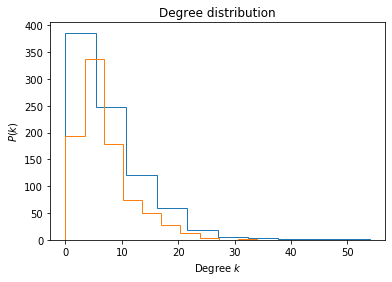

In [11]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.show()

## Finding the Largest Connected Component.

In [53]:
gen_G1 = nx.connected_components(G1)

In [54]:
subgraphs_G1 = [G1.subgraph(c) for c in gen_G1]

In [55]:
subgraphs_G1

In [56]:
G1_LCC = max(subgraphs_G1, key=len)

In [68]:
gen_G2 = nx.connected_components(G2)
subgraphs_G2 = [G2.subgraph(c) for c in gen_G2]
G2_LCC = max(subgraphs_G2, key=len)

In [69]:
len(G1_LCC)

825

In [70]:
len(G2_LCC)

810

In [71]:
len(G1_LCC) / G1.number_of_nodes()

0.9786476868327402

In [72]:
len(G2_LCC) / G2.number_of_nodes()

0.9236031927023945

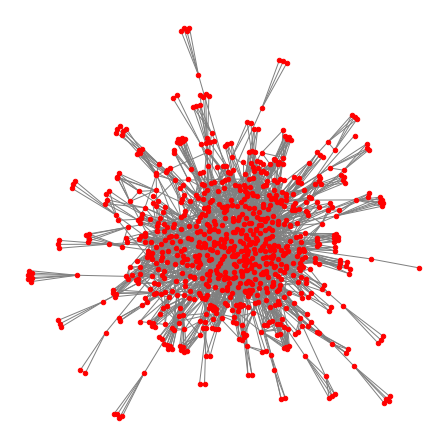

In [74]:
plt.figure(figsize=(6,6))
nx.draw(G1_LCC, node_color="red", edge_color="gray", node_size=20)
plt.show()

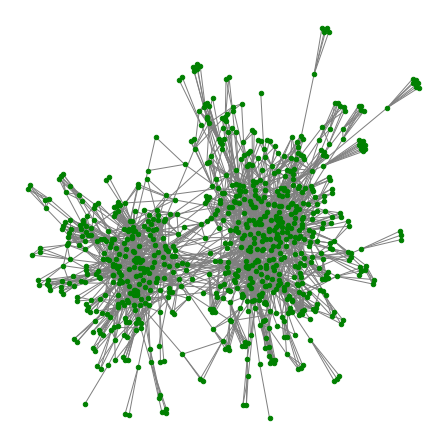

In [75]:
plt.figure(figsize=(6,6))
nx.draw(G2_LCC, node_color="green", edge_color="grey", node_size=20)
plt.show()